In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv("users_by_me.csv")

In [3]:
df.shape

(1050, 10)

In [4]:
df.head()

,id,name,screen_name,location,description,url_imagen,bot,gender,gender_by_human,url_prof
0,70593508,Martín Orozco,MartinOrozcoAgs,Aguascalientes,Gobernador Constitucional del Estado de Aguasc...,http://pbs.twimg.com/profile_images/1576639480...,0,1,1,https://twitter.com/MartinOrozcoAgs
1,81260046,Fernando Herrera,FHerreraAvila,Aguascalientes,Rector de la Universidad Tecnológica Metropoli...,http://pbs.twimg.com/profile_images/1578157859...,0,-1,1,https://twitter.com/FHerreraAvila
2,891111621212295168,Oso Carpintero Aguascalientes,oso_carpintero,Aguascalientes,🔨🐻🔨,http://pbs.twimg.com/profile_images/1273304233...,0,-1,1,https://twitter.com/oso_carpintero
3,222362926,Mireya Cuéllar,mireya_cuellar,Baja California,Periodista: directora de La Jornada Baja Calif...,http://pbs.twimg.com/profile_images/5569988187...,0,1,0,https://twitter.com/mireya_cuellar
4,243990516,javier plascencia,JavPlascencia,Baja California,"cocinero norteno amante del mar ,baja californ...",http://pbs.twimg.com/profile_images/7710531698...,0,0,1,https://twitter.com/JavPlascencia


In [5]:
df['gender_by_human'].value_counts()

 1    478
 0    301
-1    271
Name: gender_by_human, dtype: int64

In [6]:
# Preprocessing
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

# https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate/34294022
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
df2 = df[np.logical_and( df['description'].notna() ,(df['gender_by_human'] != -1))]
df2

,id,name,screen_name,location,description,url_imagen,bot,gender,gender_by_human,url_prof
0,70593508,Martín Orozco,MartinOrozcoAgs,Aguascalientes,Gobernador Constitucional del Estado de Aguasc...,http://pbs.twimg.com/profile_images/1576639480...,0,1,1,https://twitter.com/MartinOrozcoAgs
1,81260046,Fernando Herrera,FHerreraAvila,Aguascalientes,Rector de la Universidad Tecnológica Metropoli...,http://pbs.twimg.com/profile_images/1578157859...,0,-1,1,https://twitter.com/FHerreraAvila
2,891111621212295168,Oso Carpintero Aguascalientes,oso_carpintero,Aguascalientes,🔨🐻🔨,http://pbs.twimg.com/profile_images/1273304233...,0,-1,1,https://twitter.com/oso_carpintero
3,222362926,Mireya Cuéllar,mireya_cuellar,Baja California,Periodista: directora de La Jornada Baja Calif...,http://pbs.twimg.com/profile_images/5569988187...,0,1,0,https://twitter.com/mireya_cuellar
4,243990516,javier plascencia,JavPlascencia,Baja California,"cocinero norteno amante del mar ,baja californ...",http://pbs.twimg.com/profile_images/7710531698...,0,0,1,https://twitter.com/JavPlascencia
...,...,...,...,...,...,...,...,...,...,...
1028,175463754,Gerardo Islas,gerislas,Mexico,Soy el Presidente Nacional del partido “Fuerza...,http://pbs.twimg.com/profile_images/1397388920...,0,1,1,https://twitter.com/gerislas
1029,87024989,Carlos Quesnel,quesnelc,Mexico,Cónsul de México en Portland/Consul of Mexico ...,http://pbs.twimg.com/profile_images/1323386867...,0,-1,1,https://twitter.com/quesnelc
1030,225210710,X Baalam Ko'olel,Mayusa25,Mexico,"🍀Mujer Mayahablante, 🇲🇽 ex Dip. Federal, Capac...",http://pbs.twimg.com/profile_images/1537575228...,0,0,0,https://twitter.com/Mayusa25
1032,136036586,Zuleyma Huidobro,ZuleymaHuidobro,Mexico,Directora General de Asuntos Jurídicos en el S...,http://pbs.twimg.com/profile_images/1310376191...,0,0,0,https://twitter.com/ZuleymaHuidobro


In [8]:
target = df2['gender_by_human']
text = df2['description']

In [9]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

#Colima - #CdMx 
fan de Cruz Azul y Real Madrid ❤️❤️‍🩹
👑✌🌎
https://t.co/9O6qEiDK8a
DDHH
tuits a título personal.
t
#Colima - #CdMx 
fan de Cruz Azul y Real Madrid ❤️❤️‍🩹
👑✌🌎

DDHH
tuits a título personal.


In [10]:
text = df2["description"].apply(lambda x: remove_URL(x)).copy()

In [11]:
text = text.apply(lambda x: remove_punct(x)).copy()
text

0       Gobernador Constitucional del Estado de Aguasc...
1       Rector de la Universidad Tecnológica Metropoli...
2                                                     🔨🐻🔨
3       Periodista directora de La Jornada Baja Califo...
4       cocinero norteno amante del mar baja californi...
                              ...                        
1028    Soy el Presidente Nacional del partido “Fuerza...
1029    Cónsul de México en PortlandConsul of Mexico i...
1030    🍀Mujer Mayahablante 🇲🇽 ex Dip Federal Capacita...
1032    Directora General de Asuntos Jurídicos en el S...
1048                           Periodista UNAM La Jornada
Name: description, Length: 690, dtype: object

In [12]:
df2["description"] = df2["description"].apply(lambda x: remove_URL(x)).copy() # map(lambda x: remove_URL(x))
df2["description"] = df2["description"].apply(lambda x: remove_punct(x)).copy()

C:\Users\monch\AppData\Local\Temp\ipykernel_12932\1257815321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["description"] = df2["description"].apply(lambda x: remove_URL(x)).copy() # map(lambda x: remove_URL(x))
C:\Users\monch\AppData\Local\Temp\ipykernel_12932\1257815321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["description"] = df2["description"].apply(lambda x: remove_punct(x)).copy()


In [13]:
# remove stopwords
!pip install nltk

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them 
# as the result of a search query.
stop = set(stopwords.words("spanish"))

# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stop

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [16]:
text = text.apply(remove_stopwords)

In [17]:
text

0       gobernador constitucional aguascalientes 20162022
1       rector universidad tecnológica metropolitana a...
2                                                     🔨🐻🔨
3            periodista directora jornada baja california
4       cocinero norteno amante mar baja california gente
                              ...                        
1028    presidente nacional partido “fuerza méxico” pa...
1029    cónsul méxico portlandconsul of mexico in port...
1030    🍀mujer mayahablante 🇲🇽 ex dip federal capacita...
1032    directora general asuntos jurídicos senado rep...
1048                              periodista unam jornada
Name: description, Length: 690, dtype: object

In [18]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(text)

In [19]:
len(counter)

3334

In [20]:
counter

Counter({'gobernador': 7,
         'constitucional': 4,
         'aguascalientes': 3,
         '20162022': 1,
         'rector': 2,
         'universidad': 19,
         'tecnológica': 2,
         'metropolitana': 4,
         'contador': 5,
         'público': 8,
         'abogado': 27,
         'orgullosamente': 16,
         'aguascalentense': 1,
         '🔨🐻🔨': 1,
         'periodista': 36,
         'directora': 6,
         'jornada': 4,
         'baja': 19,
         'california': 20,
         'cocinero': 2,
         'norteno': 1,
         'amante': 20,
         'mar': 1,
         'gente': 4,
         'diputado': 20,
         'federal': 19,
         'lx1': 1,
         'legislatura': 19,
         'sudcalifornianopapá': 1,
         'ricardito': 1,
         'maría': 1,
         'angelina': 2,
         'esposo': 5,
         'mendoza': 1,
         'egresado': 4,
         'uabcs': 1,
         '¡todo': 1,
         'sur': 8,
         'super': 1,
         'mayos': 1,
         'navojoa': 1,
   

In [21]:
counter.most_common(5)

[('méxico', 139),
 ('ciudad', 68),
 ('periodista', 36),
 ('quintana', 36),
 ('roo', 36)]

In [22]:
num_unique_words = len(counter)

In [23]:
text

0       gobernador constitucional aguascalientes 20162022
1       rector universidad tecnológica metropolitana a...
2                                                     🔨🐻🔨
3            periodista directora jornada baja california
4       cocinero norteno amante mar baja california gente
                              ...                        
1028    presidente nacional partido “fuerza méxico” pa...
1029    cónsul méxico portlandconsul of mexico in port...
1030    🍀mujer mayahablante 🇲🇽 ex dip federal capacita...
1032    directora general asuntos jurídicos senado rep...
1048                              periodista unam jornada
Name: description, Length: 690, dtype: object

In [24]:
# Split dataset into training and validation set
train_size = int(df2.shape[0] * 0.8)

train_sentences = text.iloc[:train_size]
val_sentences = text.iloc[train_size:]
train_labels = target.iloc[:train_size]
val_labels = target.iloc[train_size:]



In [25]:
train_sentences.shape, val_sentences.shape

((552,), (138,))

In [3]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

NameError: name 'num_unique_words' is not defined

In [27]:
# each word has unique index
word_index = tokenizer.word_index

In [51]:
tokenizer

In [28]:
word_index

{'méxico': 1,
 'ciudad': 2,
 'periodista': 3,
 'abogado': 4,
 'derecho': 5,
 'california': 6,
 'social': 7,
 'baja': 8,
 'director': 9,
 'general': 10,
 'guerrero': 11,
 'ser': 12,
 'universidad': 13,
 'personal': 14,
 'nuevo': 15,
 'quintana': 16,
 'orgullosamente': 17,
 'amante': 18,
 'legislatura': 19,
 'ex': 20,
 'profesor': 21,
 'instagram': 22,
 'león': 23,
 'roo': 24,
 '🇲🇽': 25,
 'vida': 26,
 'corazón': 27,
 'lic': 28,
 'diputada': 29,
 'federal': 30,
 'presidente': 31,
 'pública': 32,
 'comunicación': 33,
 'mexico': 34,
 'cdmx': 35,
 'i': 36,
 'siempre': 37,
 'gobierno': 38,
 'in': 39,
 'familia': 40,
 'comprometido': 41,
 'oficial': 42,
 'amo': 43,
 'diputado': 44,
 'historia': 45,
 'apasionado': 46,
 'and': 47,
 'música': 48,
 'título': 49,
 'fútbol': 50,
 'secretario': 51,
 'coordinador': 52,
 'si': 53,
 'jalisco': 54,
 'madre': 55,
 'quiero': 56,
 'política': 57,
 'amor': 58,
 'ahora': 59,
 'educación': 60,
 'nacional': 61,
 'colima': 62,
 'mexicana': 63,
 'padre': 64,
 'di

In [29]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [30]:
print(train_sentences.iloc[10:15])
print(train_sequences[10:15])

10    mujer terreno potosina cdmx arcilla huasteca a...
11    trabajando integración personas refugiadas baj...
12                      hecho baja california sur 🌵🌊 ☀️
14                apasionado baja california sur méxico
15                                  baja california sur
Name: description, dtype: object
[[75, 630, 631, 35, 632, 633, 218, 8, 6, 219, 634, 635, 18, 636, 637, 638, 639], [335, 640, 220, 641, 8, 6, 642, 643, 336, 36, 644, 39, 645, 646, 647, 337], [338, 8, 6, 74, 648, 649], [46, 8, 6, 74, 1], [8, 6, 74]]


In [31]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((552, 20), (138, 20))

In [32]:
train_padded[10]

array([ 75, 630, 631,  35, 632, 633, 218,   8,   6, 219, 634, 635,  18,
       636, 637, 638, 639,   0,   0,   0])

In [33]:
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

mujer terreno potosina cdmx arcilla huasteca arena baja california agua río colorado amante desierto frontera sorda tinnitus
[75, 630, 631, 35, 632, 633, 218, 8, 6, 219, 634, 635, 18, 636, 637, 638, 639]
[ 75 630 631  35 632 633 218   8   6 219 634 635  18 636 637 638 639   0
   0   0]


In [34]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [35]:
reverse_word_index

{1: 'méxico',
 2: 'ciudad',
 3: 'periodista',
 4: 'abogado',
 5: 'derecho',
 6: 'california',
 7: 'social',
 8: 'baja',
 9: 'director',
 10: 'general',
 11: 'guerrero',
 12: 'ser',
 13: 'universidad',
 14: 'personal',
 15: 'nuevo',
 16: 'quintana',
 17: 'orgullosamente',
 18: 'amante',
 19: 'legislatura',
 20: 'ex',
 21: 'profesor',
 22: 'instagram',
 23: 'león',
 24: 'roo',
 25: '🇲🇽',
 26: 'vida',
 27: 'corazón',
 28: 'lic',
 29: 'diputada',
 30: 'federal',
 31: 'presidente',
 32: 'pública',
 33: 'comunicación',
 34: 'mexico',
 35: 'cdmx',
 36: 'i',
 37: 'siempre',
 38: 'gobierno',
 39: 'in',
 40: 'familia',
 41: 'comprometido',
 42: 'oficial',
 43: 'amo',
 44: 'diputado',
 45: 'historia',
 46: 'apasionado',
 47: 'and',
 48: 'música',
 49: 'título',
 50: 'fútbol',
 51: 'secretario',
 52: 'coordinador',
 53: 'si',
 54: 'jalisco',
 55: 'madre',
 56: 'quiero',
 57: 'política',
 58: 'amor',
 59: 'ahora',
 60: 'educación',
 61: 'nacional',
 62: 'colima',
 63: 'mexicana',
 64: 'padre',
 65:

In [36]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [37]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[75, 630, 631, 35, 632, 633, 218, 8, 6, 219, 634, 635, 18, 636, 637, 638, 639]
mujer terreno potosina cdmx arcilla huasteca arena baja california agua río colorado amante desierto frontera sorda tinnitus


In [38]:
def graficar(history,epochs):
  '''
  Graficamos la presicion en entrenamiento contra la validacion tambien con la perdida
  
  '''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Precisión en el entrenamiento')
  plt.plot(epochs_range, val_acc, label='Precisión en la validación')
  plt.legend(loc='lower right')
  plt.title('Precisión de los conjuntos')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Error en el entrenamiento')
  plt.plot(epochs_range, val_loss, label='Error en la validación')
  plt.legend(loc='upper right')
  plt.title('Error de los conjuntos')
  plt.show()
#graficar(history,epochs)

In [39]:
# Create LSTM model
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have 
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a 
# dense vector of floating point values (the length of the vector is a parameter you specify).

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

# The layer will take as input an integer matrix of size (batch, input_length),
# and the largest integer (i.e. word index) in the input should be no larger than num_words (vocabulary size).
# Now model.output_shape is (None, input_length, 32), where `None` is the batch dimension.


model.add(layers.LSTM(32, dropout=0.3))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            106688    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 115,041
Trainable params: 115,041
Non-trainable params: 0
_________________________________________________________________


In [40]:
loss = keras.losses.BinaryCrossentropy()#from_logits=False)
optim = keras.optimizers.Adam(lr=0.0003)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

c:\Users\monch\anaconda3\envs\person_detection\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [41]:
epochs = 12
history = model.fit(train_padded, train_labels, epochs=epochs, validation_data=(val_padded, val_labels))

Epoch 1/12
18/18 [==============================] - 11s 48ms/step - loss: 0.6899 - accuracy: 0.5906 - val_loss: 0.6822 - val_accuracy: 0.6304
Epoch 2/12
18/18 [==============================] - 0s 11ms/step - loss: 0.6796 - accuracy: 0.6232 - val_loss: 0.6724 - val_accuracy: 0.6304
Epoch 3/12
18/18 [==============================] - 0s 11ms/step - loss: 0.6707 - accuracy: 0.6232 - val_loss: 0.6629 - val_accuracy: 0.6304
Epoch 4/12
18/18 [==============================] - 0s 12ms/step - loss: 0.6621 - accuracy: 0.6232 - val_loss: 0.6597 - val_accuracy: 0.6304
Epoch 5/12
18/18 [==============================] - 0s 12ms/step - loss: 0.6569 - accuracy: 0.6232 - val_loss: 0.6590 - val_accuracy: 0.6304
Epoch 6/12
18/18 [==============================] - 0s 12ms/step - loss: 0.6476 - accuracy: 0.6232 - val_loss: 0.6588 - val_accuracy: 0.6304
Epoch 7/12
18/18 [==============================] - 0s 12ms/step - loss: 0.6242 - accuracy: 0.6232 - val_loss: 0.6467 - val_accuracy: 0.6304
Epoch 8/12
1

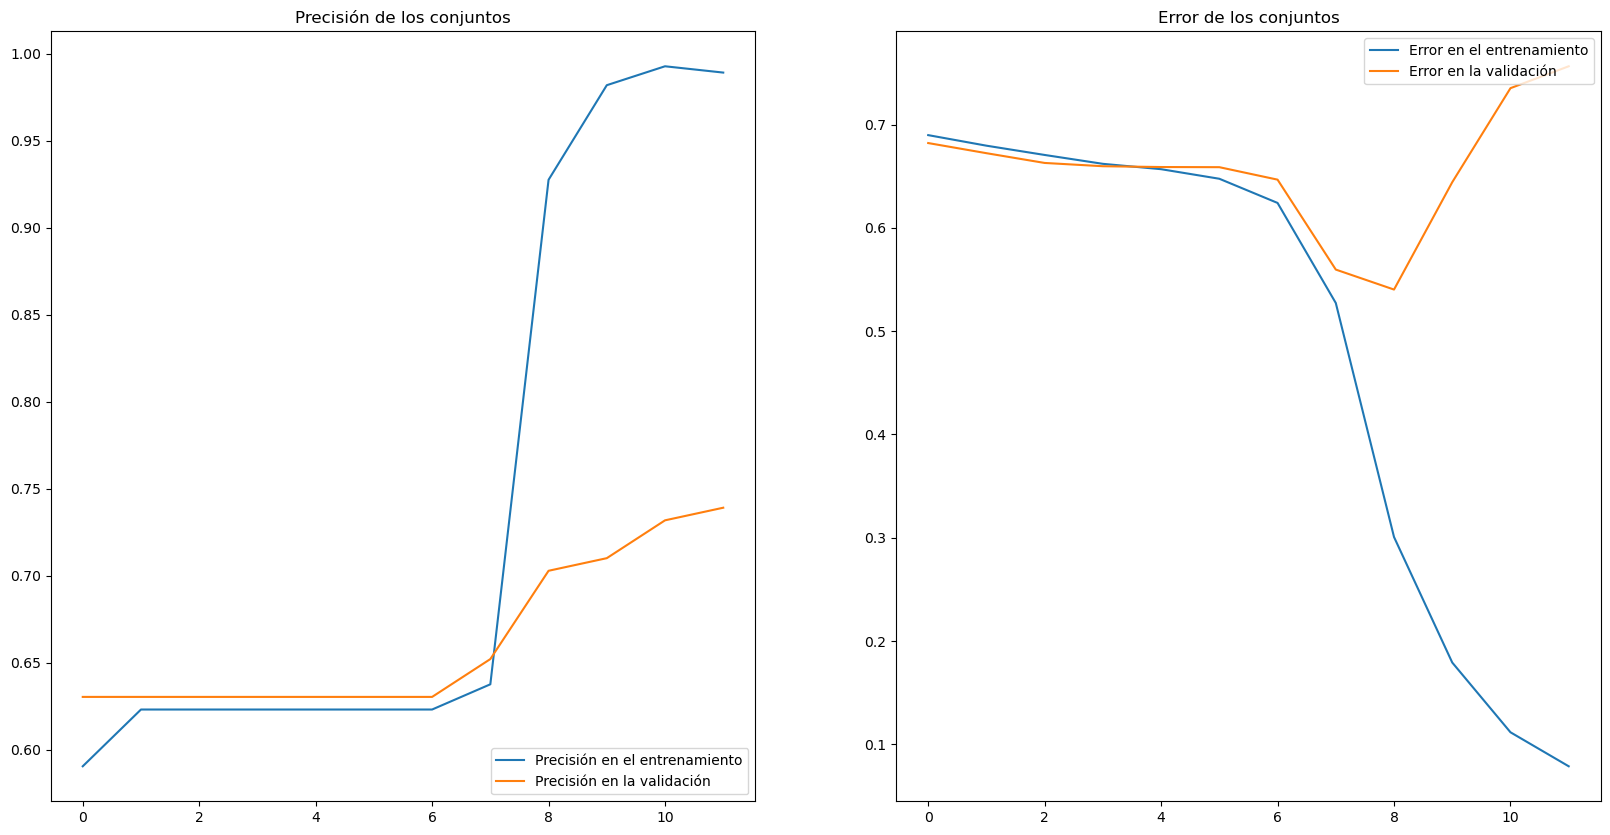

In [42]:
graficar(history, epochs)

In [43]:
predictions = model.predict(train_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

18/18 [==============================] - 1s 6ms/step


In [61]:
print(train_sentences[10:20])
print("train_________________________________")
print(train_labels[10:20])
print("labels_________________________________")
print(predictions[10:20])

10    mujer terreno potosina cdmx arcilla huasteca a...
11    trabajando integración personas refugiadas baj...
12                      hecho baja california sur 🌵🌊 ☀️
14                apasionado baja california sur méxico
15                                  baja california sur
16    estudiante facultad derecho universidad autóno...
17                          24👤 baja california mx 🏖🌊🇲🇽
18    delegada instituto deporte baja california ens...
19    helping people find their dream homes in paz b...
20    tlaxcala 🌽baja california sur 🌵 🇲🇽 biólogo mar...
Name: description, dtype: object
train_________________________________
10    0
11    1
12    1
14    1
15    1
16    0
17    1
18    0
19    0
20    1
Name: gender_by_human, dtype: int64
labels_________________________________
[0, 0, 0, 0, 0, 1, 0, 1, 1, 0]


C:\Users\monch\AppData\Local\Temp\ipykernel_12932\989616764.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(train_sentences[10:20])
C:\Users\monch\AppData\Local\Temp\ipykernel_12932\989616764.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(train_labels[10:20])


In [45]:
#Guardamos el modelo
import os.path
if os.path.isfile('./models/modelo_text.h5') is False:
    model.save('./models/modelo_text.h5')

In [46]:
#guardamos el tokenizer para poder usar el modelos anterior

import io
import json
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [47]:
newtoken = ''

In [3]:
from  tensorflow.keras.preprocessing.text import tokenizer_from_json
import json
with open('./models/tokenizer.json') as f:
    data = json.load(f)
    newtoken = tokenizer_from_json(data)

In [53]:
newtoken.index_word

{1: 'méxico',
 2: 'ciudad',
 3: 'periodista',
 4: 'abogado',
 5: 'derecho',
 6: 'california',
 7: 'social',
 8: 'baja',
 9: 'director',
 10: 'general',
 11: 'guerrero',
 12: 'ser',
 13: 'universidad',
 14: 'personal',
 15: 'nuevo',
 16: 'quintana',
 17: 'orgullosamente',
 18: 'amante',
 19: 'legislatura',
 20: 'ex',
 21: 'profesor',
 22: 'instagram',
 23: 'león',
 24: 'roo',
 25: '🇲🇽',
 26: 'vida',
 27: 'corazón',
 28: 'lic',
 29: 'diputada',
 30: 'federal',
 31: 'presidente',
 32: 'pública',
 33: 'comunicación',
 34: 'mexico',
 35: 'cdmx',
 36: 'i',
 37: 'siempre',
 38: 'gobierno',
 39: 'in',
 40: 'familia',
 41: 'comprometido',
 42: 'oficial',
 43: 'amo',
 44: 'diputado',
 45: 'historia',
 46: 'apasionado',
 47: 'and',
 48: 'música',
 49: 'título',
 50: 'fútbol',
 51: 'secretario',
 52: 'coordinador',
 53: 'si',
 54: 'jalisco',
 55: 'madre',
 56: 'quiero',
 57: 'política',
 58: 'amor',
 59: 'ahora',
 60: 'educación',
 61: 'nacional',
 62: 'colima',
 63: 'mexicana',
 64: 'padre',
 65:

In [6]:
texto = ''

texto_secuencia = newtoken.texts_to_sequences([texto])
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
texto_padded = pad_sequences(texto_secuencia, maxlen=20, padding="post", truncating="post")

In [7]:
from tensorflow.keras.models import load_model

m = load_model('./models/modelo_text.h5')

In [8]:
predictions = m.predict(texto_padded)
predictions

1/1 [==============================] - 6s 6s/step


array([[0.34852794]], dtype=float32)

In [9]:
predictions = 1 if predictions[0] > 0.5 else 0 
predictions

0